![image info](https://ineuron.ai/images/ineuron-logo.png)

# Chronic Kidney Disease Prediction
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Data Cleaning
* Exploratory data analysis
* Data Pre-Processing
* Model Training 
* Choose best model

## 1) Problem statement.
* Early stage of Indians Chronic Kidney Disease(CKD)
* The dataset is Apollo Hospital TamilNadu, India. 
* Here we create a model to predict if the people has chance of Chronic Kidney Disease.
* It is a Binary Classification Problem statement.

## 2) Data Collection.
* Link: https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease.

* It contains measures of 24 features for 400 people. Quite a lot of features for just 400 samples.
* 14 features are numerical, while 10 are categorical.

### 2.1 Import Data and Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

**Import the CSV Data as Pandas DataFrame**

In [2]:
dataset_path = './data/chronic_kidney_disease.arff'
colNames =['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot',
            'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']

df = pd.read_csv(dataset_path, names=colNames, sep=',', header=None, index_col=False, skiprows= 29, na_values=['?'], skipinitialspace=True, usecols=range(0, 25))

**Show Top 5 Records**

In [3]:
df.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


**Shape of the dataset**

In [4]:
df.shape

(400, 25)

**Summary of the dataset**

In [5]:
# Display summary statistics for a dataframe
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


**Check Datatypes in the dataset**

In [6]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      397 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

## 3. EXPLORING DATA

### Feature Information 
* **age** - age
* **bp** - blood pressure
* **sg** - specific gravity
* **al** - albumin
* **su** - sugar
* **rbc** - red blood cells
* **pc** - pus cell
* **pcc** - pus cell clumps
* **ba** - bacteria
* **bgr** - blood glucose random
* **bu** - blood urea
* **sc** - serum creatinine
* **sod** - sodium
* **pot** - potassium
* **hemo** - hemoglobin
* **pcv** - packed cell volume
* **wc** - white blood cell count
* **rc** - red blood cell count
* **htn** - hypertension
* **dm** - diabetes mellitus
* **cad** - coronary artery disease
* **appet** - appetite
* **pe** - pedal edema
* **ane** - anemia
* **class** - class

In [7]:
colNames = ['Age','Blood_Pressure','Specific_Gravity','Albumin','Sugar','Red_Blood_Cells',
               'Pus_Cells','Pus_Cell_Clumps','Bacteria','Blood_Glucose_Random','Blood_Urea',
               'Serum_Creatinine','Sodium','Potassium','Hemoglobin','Packed_Cell_Volume',
               'White_Blood_Cells','Red_Blood_Cell_Count','Hypertension','Diabetes_Mellitus',
               'Coronary_Artery_Disease','Appetite','Pedal_Edema','Anemia','Chronic_Kidney_Disease']
df.columns= colNames

In [8]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 14 numerical features : ['Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar', 'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium', 'Potassium', 'Hemoglobin', 'Packed_Cell_Volume', 'White_Blood_Cells', 'Red_Blood_Cell_Count']

We have 11 categorical features : ['Red_Blood_Cells', 'Pus_Cells', 'Pus_Cell_Clumps', 'Bacteria', 'Hypertension', 'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite', 'Pedal_Edema', 'Anemia', 'Chronic_Kidney_Disease']


In [9]:
### Initial Datacleaning check for spelling errors

In [10]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(col)
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

Red_Blood_Cells
normal      81.048387
abnormal    18.951613
Name: Red_Blood_Cells, dtype: float64
---------------------------
Pus_Cells
normal      77.313433
abnormal    22.686567
Name: Pus_Cells, dtype: float64
---------------------------
Pus_Cell_Clumps
notpresent    89.393939
present       10.606061
Name: Pus_Cell_Clumps, dtype: float64
---------------------------
Bacteria
notpresent    94.444444
present        5.555556
Name: Bacteria, dtype: float64
---------------------------
Hypertension
no     63.065327
yes    36.934673
Name: Hypertension, dtype: float64
---------------------------
Diabetes_Mellitus
no     65.491184
yes    34.508816
Name: Diabetes_Mellitus, dtype: float64
---------------------------
Coronary_Artery_Disease
no     91.457286
yes     8.542714
Name: Coronary_Artery_Disease, dtype: float64
---------------------------
Appetite
good    79.197995
poor    20.551378
no       0.250627
Name: Appetite, dtype: float64
---------------------------
Pedal_Edema
no      80.701754


## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

Other Type of Analysis are
* **Bivariate Analysis:** The analysis of two variables.
* **Multivariate Analysis:** The analysis of two or more variables.

### Numerical Features

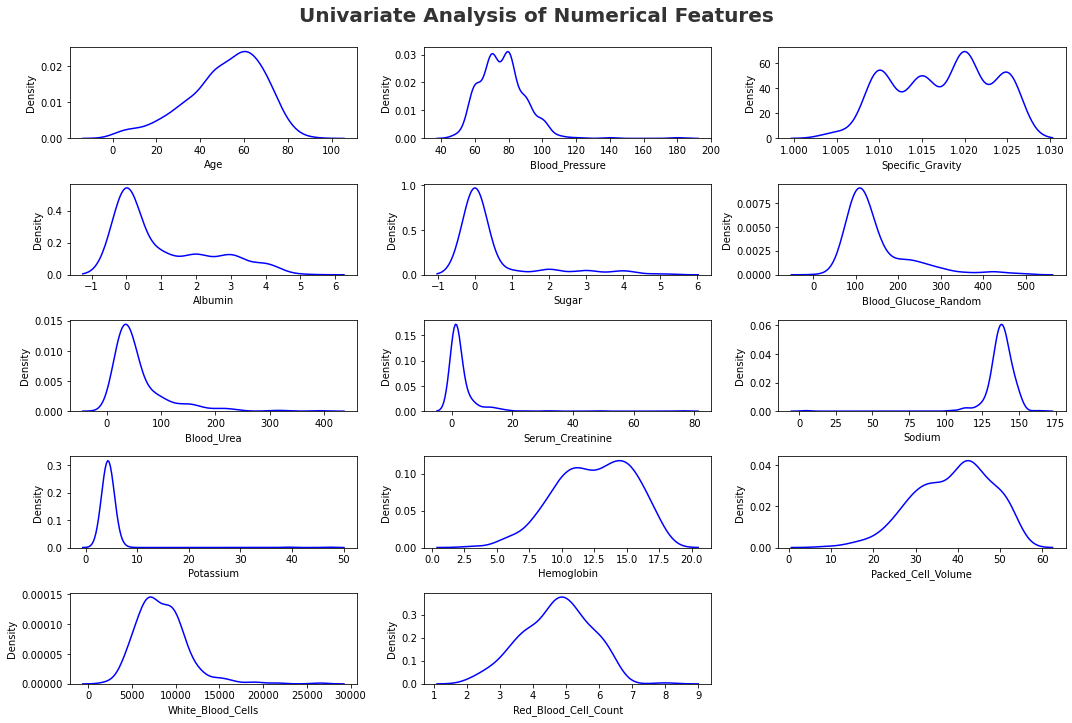

In [11]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    
# save plot
plt.savefig('./images/Univariate_Num.png')

### Categorical Features

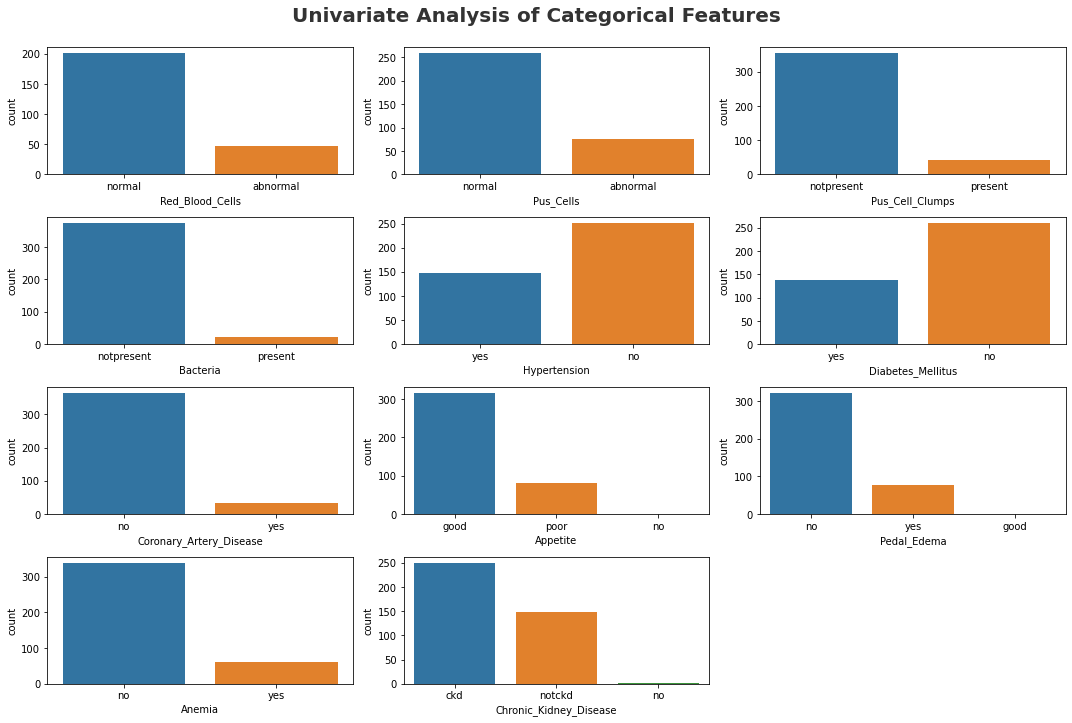

In [12]:
# categorical columns
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(4, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    
# save plot
plt.savefig('./images/Univariate_Cat.png')

In [13]:
# datacleaning for eda
df['Chronic_Kidney_Disease'].mask(df['Chronic_Kidney_Disease'] == 'no', 'notckd', inplace=True)

### Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

### Check Multicollinearity in Numerical features

In [14]:
df[(list(df.columns)[1:])].corr()

,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Blood_Glucose_Random,Blood_Urea,Serum_Creatinine,Sodium,Potassium,Hemoglobin,Packed_Cell_Volume,White_Blood_Cells,Red_Blood_Cell_Count
Blood_Pressure,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936
Specific_Gravity,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476
Albumin,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437
Sugar,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448
Blood_Glucose_Random,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541
Blood_Urea,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087
Serum_Creatinine,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852
Sodium,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873
Potassium,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309
Hemoglobin,-0.306540,0.602582,-0.634632,-0.224775,-0.306189,-0.610360,-0.401670,0.365183,-0.133746,1.000000,0.895382,-0.169413,0.798880


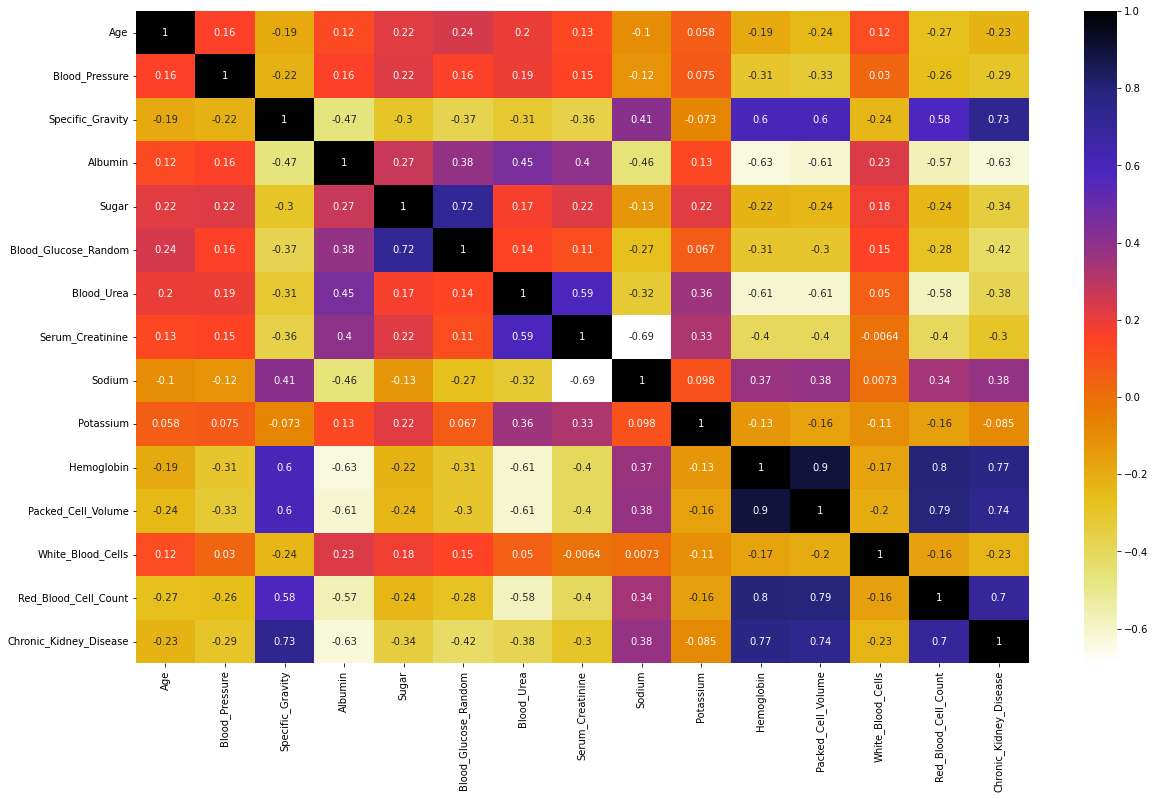

In [15]:
data = df.copy()
data["Chronic_Kidney_Disease"] = np.where(data["Chronic_Kidney_Disease"] == "ckd", 0, 1)
plt.figure(figsize = (20,12))
sns.heatmap(data.corr(), cmap="CMRmap_r", annot=True)
plt.show()

**Report** 
* Our Target column class has good negative correlation with `al, su, bgr, sc`[albumin,sugar, blood glucose random, serum creatinine].
* Our Target column has high correlation with `hemo, sg.`[Hemoglobin, specific gravity]
* There is not much multicollinearity between independent variables.

### Check Multicollinearity for Categorical features

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e ProdTaken**

In [16]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['Chronic_Kidney_Disease'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,Red_Blood_Cells,Reject Null Hypothesis
1,Pus_Cells,Reject Null Hypothesis
2,Pus_Cell_Clumps,Reject Null Hypothesis
3,Bacteria,Reject Null Hypothesis
4,Hypertension,Reject Null Hypothesis
5,Diabetes_Mellitus,Reject Null Hypothesis
6,Coronary_Artery_Disease,Reject Null Hypothesis
7,Appetite,Reject Null Hypothesis
8,Pedal_Edema,Reject Null Hypothesis
9,Anemia,Reject Null Hypothesis


**Report** 
* Almost all categorical columns are correlated with the target variable.

### Checking Null Values

In [17]:
df.isnull().sum()

Age                          9
Blood_Pressure              12
Specific_Gravity            47
Albumin                     46
Sugar                       49
Red_Blood_Cells            152
Pus_Cells                   65
Pus_Cell_Clumps              4
Bacteria                     4
Blood_Glucose_Random        44
Blood_Urea                  19
Serum_Creatinine            17
Sodium                      87
Potassium                   88
Hemoglobin                  52
Packed_Cell_Volume          71
White_Blood_Cells          106
Red_Blood_Cell_Count       131
Hypertension                 2
Diabetes_Mellitus            3
Coronary_Artery_Disease      2
Appetite                     1
Pedal_Edema                  1
Anemia                       1
Chronic_Kidney_Disease       0
dtype: int64

* There are many null values in the dataset we can impute in feature engineering section

In [18]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['Age', 'Blood_Pressure', 'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium', 'Potassium', 'Hemoglobin', 'Packed_Cell_Volume', 'White_Blood_Cells', 'Red_Blood_Cell_Count']


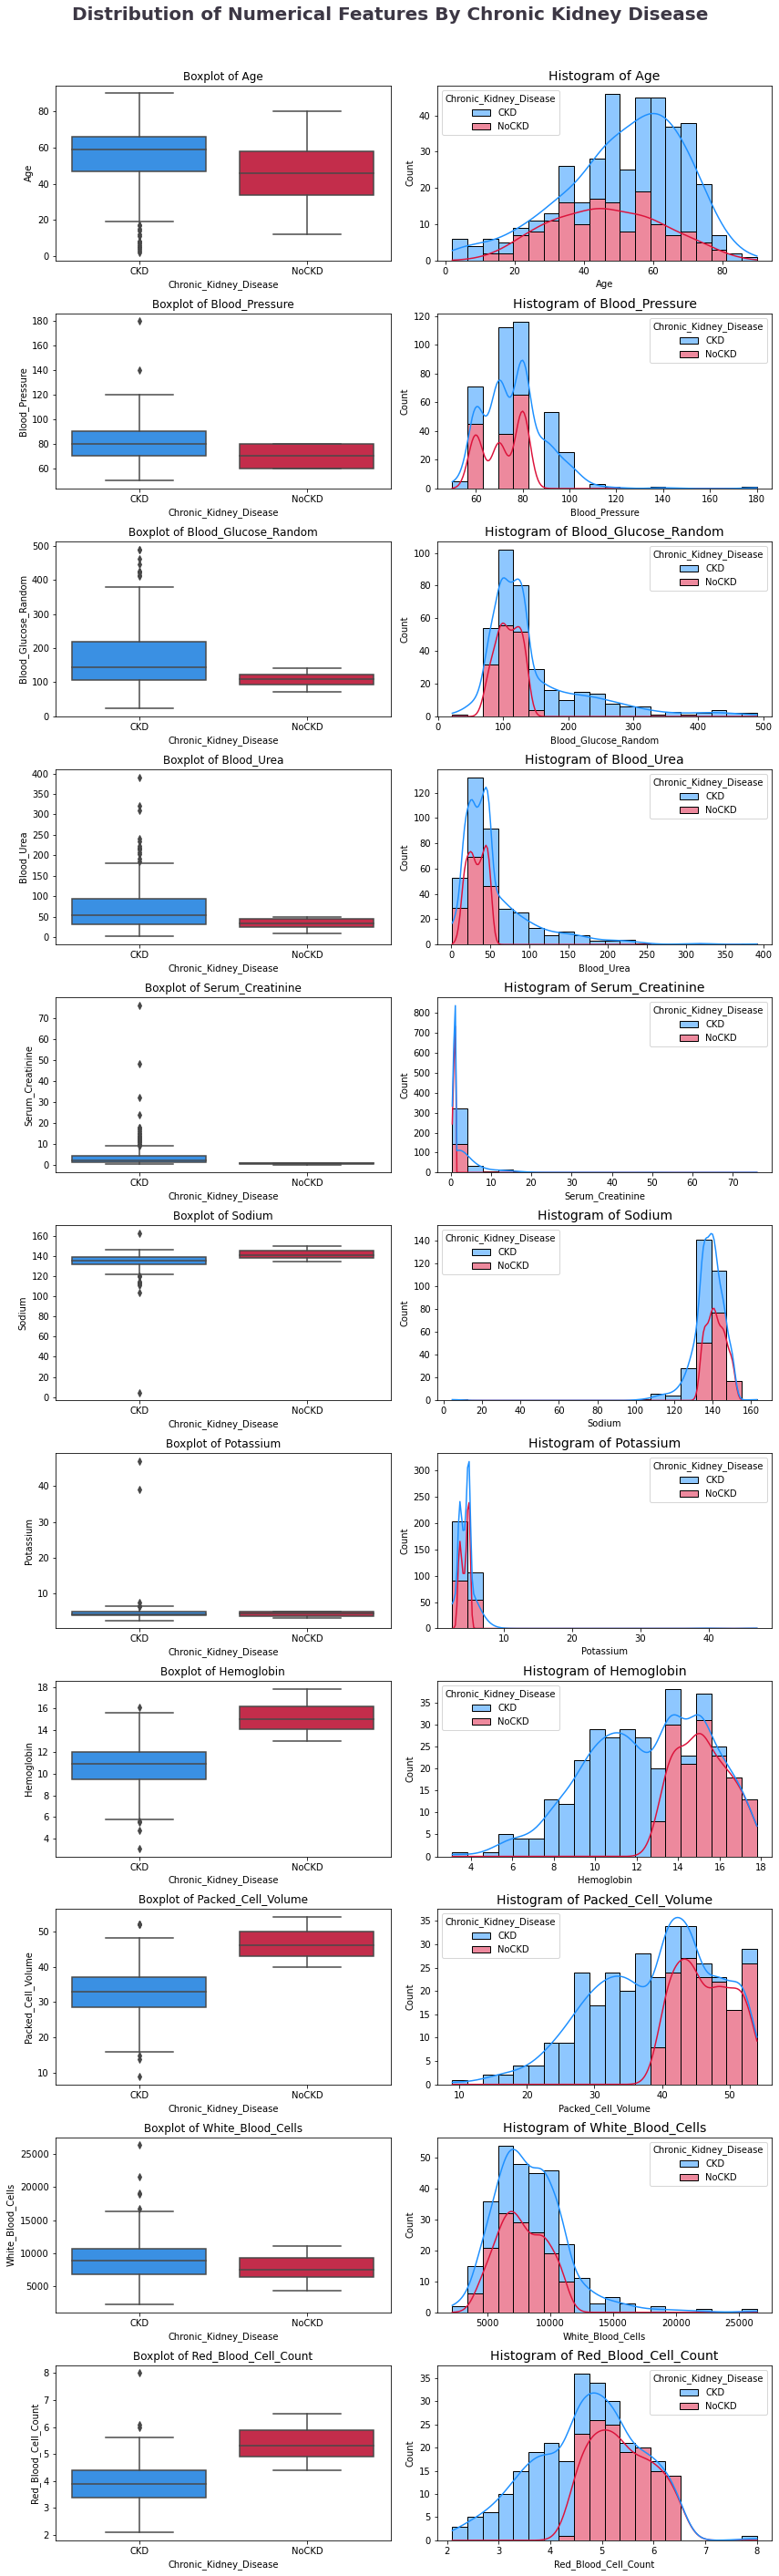

In [19]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(11, 2, figsize=(12,40))
fig.suptitle('Distribution of Numerical Features By Chronic Kidney Disease', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')

df['Chronic_Kidney_Disease'] = np.where(df['Chronic_Kidney_Disease']=='ckd', 'CKD', 'NoCKD')
for i, col in enumerate(continues_features):   
    sns.boxplot(data=df, x='Chronic_Kidney_Disease', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='Chronic_Kidney_Disease', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.savefig('images/multivariate_num.png')

**Report**
* Many columns has few outliers.
* With Higher Hemoglobin `hemo`, red blood cells count `rbcc` values has less ckd.
* Higher packed cell volume `pcv` has less chance of ckd.

## Initial Analysis Report

* **There are missing values in the 24 columns.**
* **Some of the skewed columns can be transformed.**
* **The class column is taken as prediction column.**
* **In the Categorical column, there are mostly yes or no questions which can be coverted to numericals**

## 4. Visualization

### 4.1 Visualize the Target Feature

In [20]:
percentage = df['Chronic_Kidney_Disease'].value_counts(normalize=True)*100
percentage

CKD      62.5
NoCKD    37.5
Name: Chronic_Kidney_Disease, dtype: float64

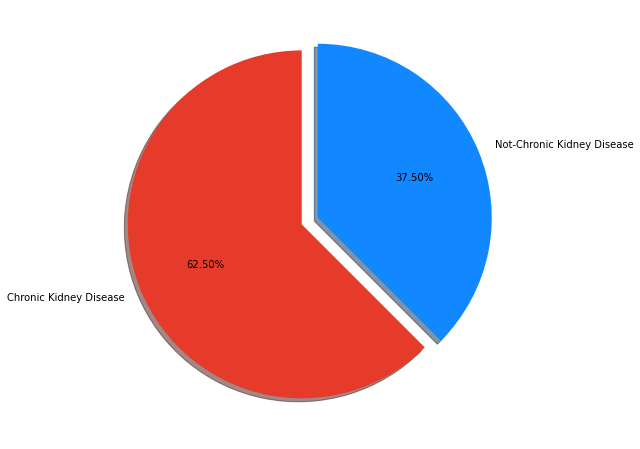

In [21]:
labels = ["Chronic Kidney Disease","Not-Chronic Kidney Disease"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#e63a2a', '#1188ff']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

### 4.2 Age and its Impact on Chronic Kidney Disease

In [22]:
age= df.groupby('Chronic_Kidney_Disease')['Age'].median()
age.to_frame()

,Age
Chronic_Kidney_Disease,
CKD,59.0
NoCKD,46.0


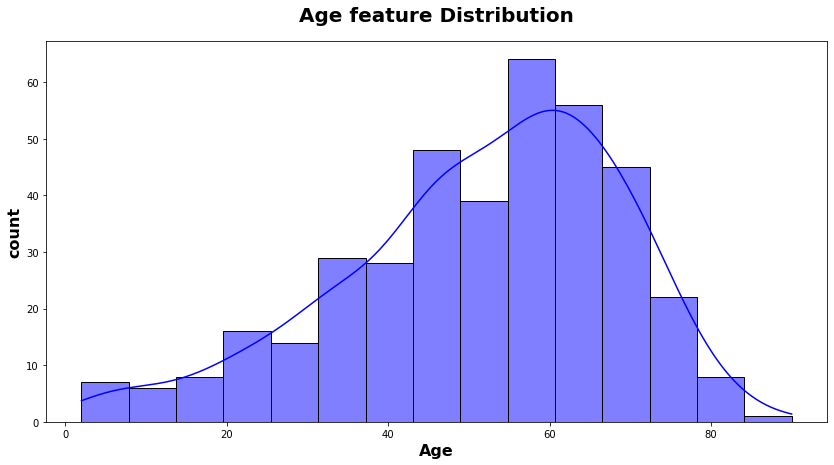

In [23]:
plt.subplots(figsize=(14,7))
sns.histplot(df.Age, kde = True, color='b')
plt.title("Age feature Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("count", weight="bold", fontsize=16)
plt.xlabel("Age", weight="bold", fontsize=16)
plt.show()

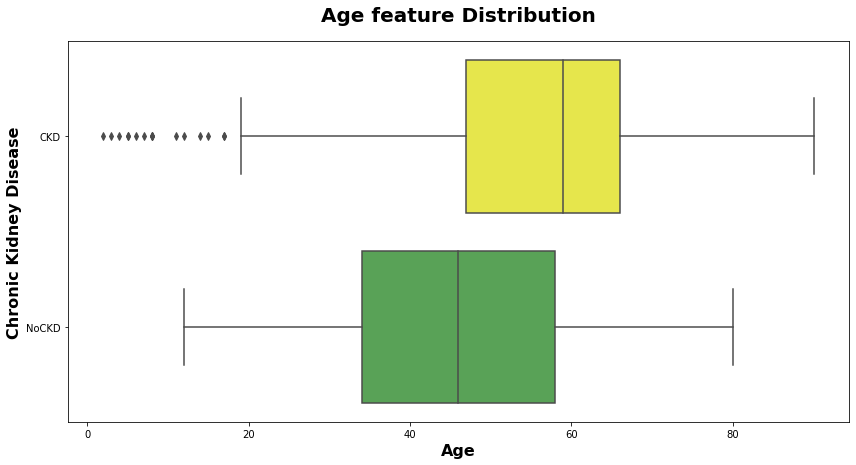

In [24]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='Age',y='Chronic_Kidney_Disease', data= df, palette='Set1_r')
plt.title("Age feature Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Chronic Kidney Disease", weight="bold", fontsize=16)
plt.xlabel("Age", weight="bold", fontsize=16)
plt.show()

**Report:**
* Median Age of people who has CKD is 59.
* Median age of people who doesnt have CKD is 46.
* As per the Chart and median value customers more than 40 and less than 70 have more count.
* The Distribution is slightly left skewed.
* This Feature has impact on the Target Variable.

#### AGE Category Split

In [25]:
bins= [0,14,24,60,100]
labels = ['Children','Youth','Adult','Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
age_group = df.groupby('AgeGroup')['Chronic_Kidney_Disease'].value_counts()
age_group.to_frame()

Chronic_Kidney_Disease
AgeGroup Chronic_Kidney_Disease                        
Children CKD                                         12
         NoCKD                                        1
Youth    NoCKD                                       10
         CKD                                          7
Adult    CKD                                        105
         NoCKD                                      105
Senior   CKD                                        118
         NoCKD                                       33

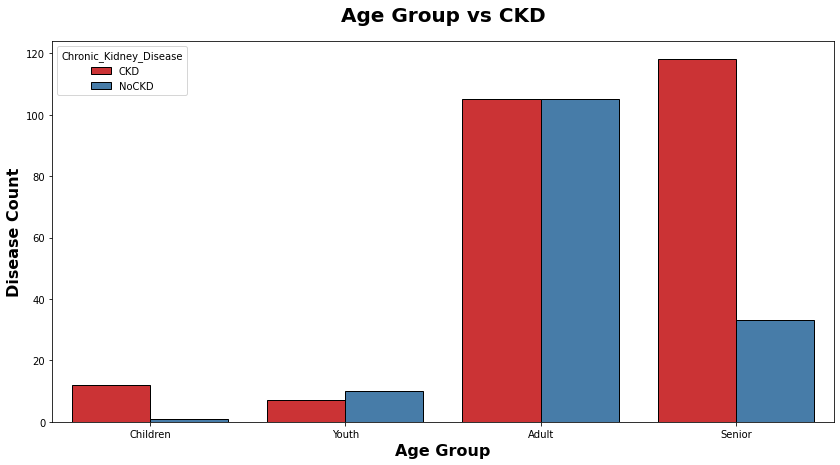

In [26]:
plt.subplots(figsize=(14,7))
sns.countplot(x="AgeGroup",hue="Chronic_Kidney_Disease",data=df,ec = "black",palette="Set1")
plt.title("Age Group vs CKD", weight="bold",fontsize=20, pad=20)
plt.ylabel("Disease Count", weight="bold", fontsize=16)
plt.xlabel("Age Group", weight="bold", fontsize=16)
plt.show()

**Report:**
* As per the Chart Senior age Group has the most number of Chronic_Kidney_Disease.
* Child patients with age group 0-14 has more Chronic_Kidney_Disease compared to nonCKD patients on that age category.
* Adult share equal amount of CKD and non CKD people count.

### 4.3 Blood Pressure and its effect on Chronic kidney disease.

In [27]:
bp= df.groupby('Chronic_Kidney_Disease').Blood_Pressure.median()
bp.to_frame()

,Blood_Pressure
Chronic_Kidney_Disease,
CKD,80.0
NoCKD,70.0


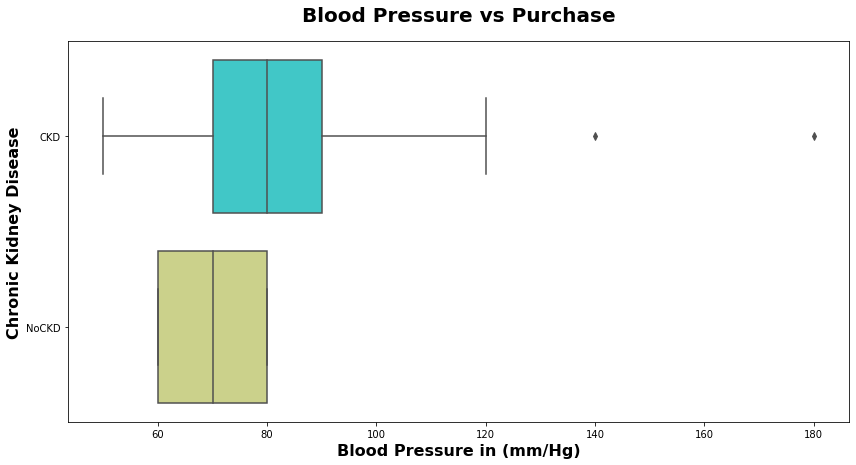

In [28]:
plt.subplots(figsize=(14,7))
sns.boxplot(x="Blood_Pressure",y='Chronic_Kidney_Disease', data=df, palette='rainbow')
plt.title("Blood Pressure vs Purchase", weight="bold",fontsize=20, pad=20)
plt.ylabel("Chronic Kidney Disease", weight="bold", fontsize=16)
plt.xlabel("Blood Pressure in (mm/Hg)", weight="bold", fontsize=16)
plt.show()

**Report:**
* People with all range of blood pressure has CKD but mostly people 70-90.
* Median Blood pressure of people with CKD is 80.
* Median Blood pressure of people without CKD is 70.

### 4.4 Specific gravity and its effect on Chronic Kidney Disease

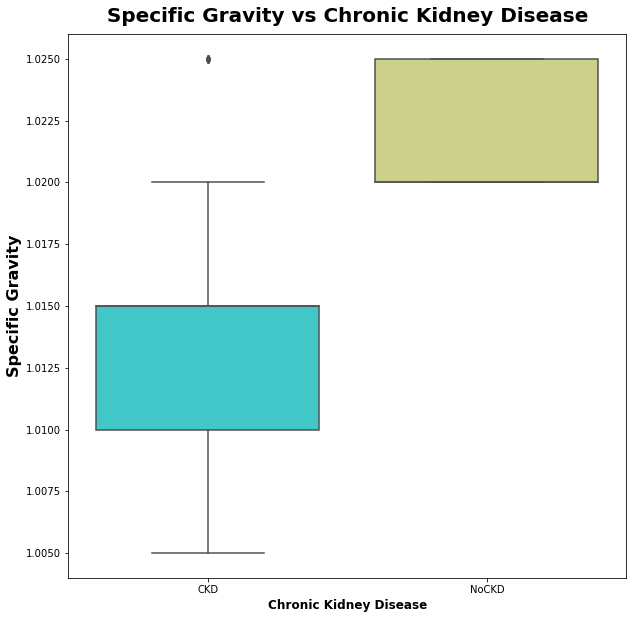

In [29]:
plt.subplots(figsize=(10,10))
sns.boxplot(y="Specific_Gravity",x='Chronic_Kidney_Disease', data=df, palette='rainbow')
plt.title("Specific Gravity vs Chronic Kidney Disease", weight="bold",fontsize=20, pad=12)
plt.xlabel("Chronic Kidney Disease", weight="bold", fontsize=12)
plt.ylabel("Specific Gravity", weight="bold", fontsize=16)
plt.show()

### 4.5 Albumin and its effect on Chronic Kidney Disease

What is albumin? 
* Albuminuria is a sign of kidney disease and means that you have too much albumin in your urine. 
* Albumin is a protein found in the blood. A healthy kidney doesn't let albumin pass from the blood into the urine. A damaged kidney lets some albumin pass into the urine.


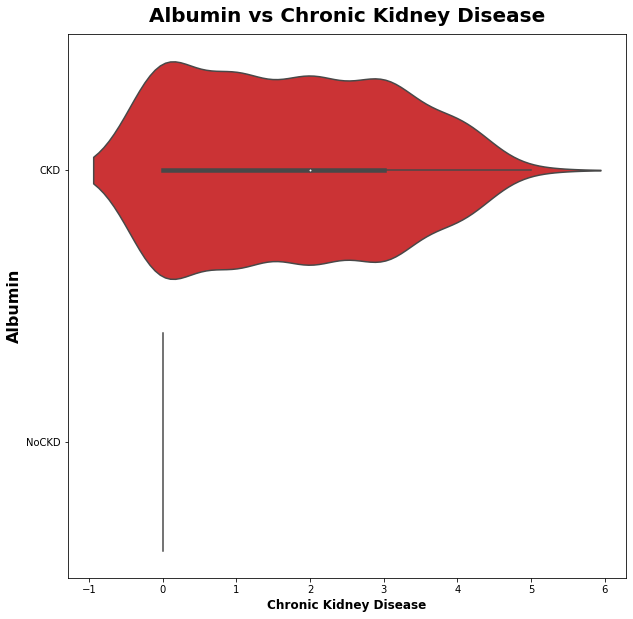

In [51]:
plt.subplots(figsize=(10,10))
sns.violinplot(x="Albumin",y='Chronic_Kidney_Disease', data=df, palette='Set1')
plt.title("Albumin vs Chronic Kidney Disease", weight="bold",fontsize=20, pad=12)
plt.xlabel("Chronic Kidney Disease", weight="bold", fontsize=12)
plt.ylabel("Albumin", weight="bold", fontsize=16)
plt.show()

In [31]:
albumin= df.groupby('Chronic_Kidney_Disease').Albumin.median()
albumin.to_frame()

,Albumin
Chronic_Kidney_Disease,
CKD,2.0
NoCKD,0.0


**Report** 
* So if the person doesn't have albumin in urine then they doesnt have Chronic Kidney Disease.
* Albumin ranges from -1 to 6.
* If person has CKD the median of albumin in urine is 2.0

### 4.6 Red Blood Cells and its effect on Chronic Kidney Disease

* A red blood cell (RBC) count measures the number of red blood cells, also known as erythrocytes, in your blood. Red blood cells carry oxygen from your lungs to every cell in your body. 

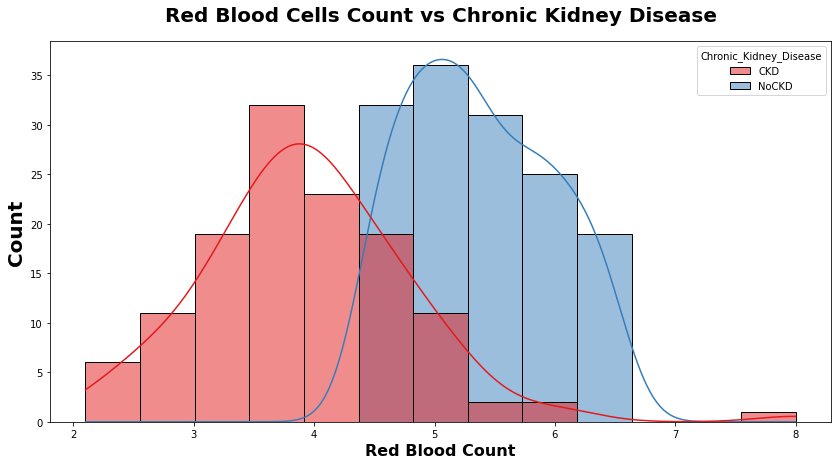

In [52]:
plt.subplots(figsize=(14,7))
sns.histplot(x="Red_Blood_Cell_Count",hue="Chronic_Kidney_Disease", data=df, palette='Set1', kde=True)
plt.title("Red Blood Cells Count vs Chronic Kidney Disease", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Red Blood Count", weight="bold", fontsize=16)
plt.show()

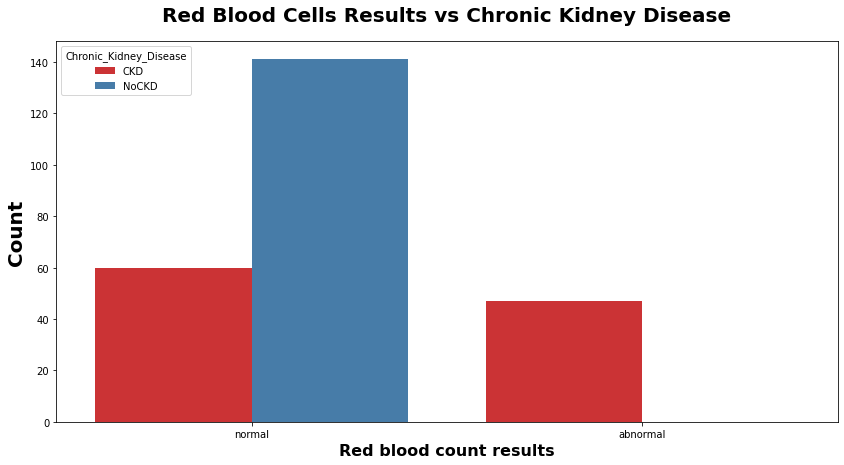

In [33]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Red_Blood_Cells",hue="Chronic_Kidney_Disease", data=df,palette="Set1")
plt.title("Red Blood Cells Results vs Chronic Kidney Disease", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Red blood count results", weight="bold", fontsize=16)
plt.show()

In [34]:
rbc= df.groupby('Chronic_Kidney_Disease').Red_Blood_Cell_Count.median()
rbc.to_frame()

,Red_Blood_Cell_Count
Chronic_Kidney_Disease,
CKD,3.9
NoCKD,5.3


**Report:**
* Median of RBC count is 3.9 for people with CKD and Median of RBC count is 5.3 for NoCKD.
* Which means higher RBC lower the chance of Chronic Kidney Disease.
* As per the Chart RBC Count has impact on the target variable.
* RBC count results with abnormal has only CKD people.

### 4.7 Pus cells and Pus cells clumps.

* The presence of pus cells in urine is also called pyuria, and is defined as >10 pus cells / microlitre of urine. 
* Increased number of pus cells may reveal some destructive anywhere from kidney to the bladder. It usually is taken as indicative of an infection.

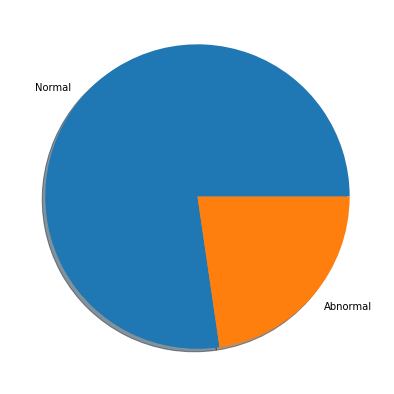

In [35]:
plt.subplots(figsize=(14,7))
plt.pie(df['Pus_Cells'].value_counts(), labels=['Normal', 'Abnormal'], shadow=True)
plt.show()

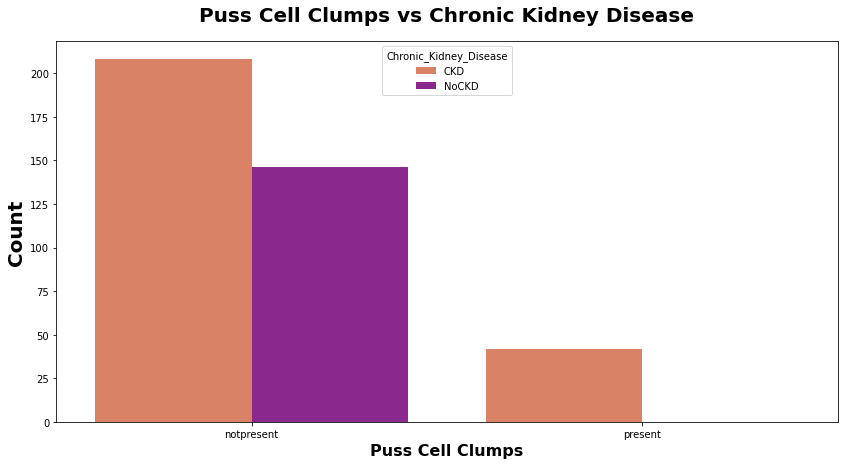

In [36]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Pus_Cell_Clumps",hue="Chronic_Kidney_Disease", data=df, palette='plasma_r')
plt.title("Puss Cell Clumps vs Chronic Kidney Disease", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Puss Cell Clumps", weight="bold", fontsize=16)
plt.show()

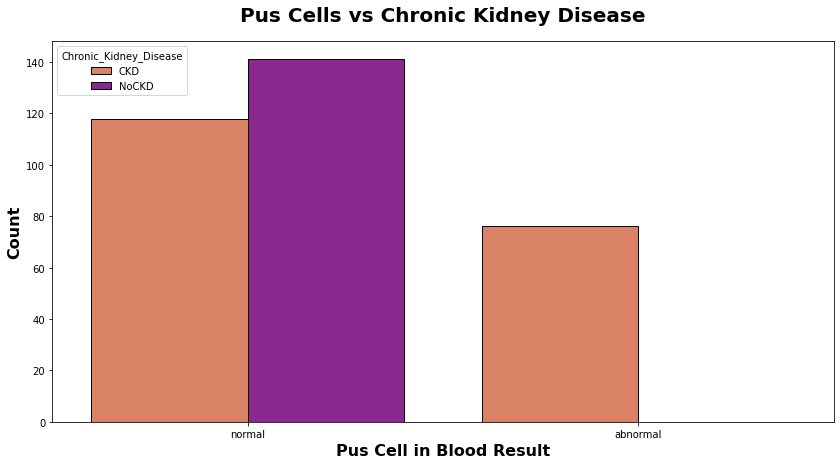

In [37]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Pus_Cells",hue="Chronic_Kidney_Disease", data= df,ec = "black",palette="plasma_r")
plt.title("Pus Cells vs Chronic Kidney Disease", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=16)
plt.xlabel("Pus Cell in Blood Result", weight="bold", fontsize=16)
plt.show()

In [38]:
df.groupby(['Pus_Cell_Clumps', 'Pus_Cells'])['Chronic_Kidney_Disease'].value_counts(normalize=True)

Pus_Cell_Clumps  Pus_Cells  Chronic_Kidney_Disease
notpresent       abnormal   CKD                       1.000000
                 normal     NoCKD                     0.556452
                            CKD                       0.443548
present          abnormal   CKD                       1.000000
                 normal     CKD                       1.000000
Name: Chronic_Kidney_Disease, dtype: float64

**Report**
* If the pus cells clumps are present both normal and abnormal pus cells have 100% chance of CKD.
* If the Pus Cells clumps if not present in urine it has 58% of CKD.
* If the pus cells clumps not present and normal pus cells in blood it has 55% chance of No CKD and 44% chance of no CKD.

### 4.8 Sugar and Blood Glucose Random and its effect on Chronic Kidney Disease.

* Blood sugar, or glucose, is the main sugar found in your blood. It comes from the food you eat, and is your body's main source of energy. Your blood carries glucose to all of your body's cells to use for energy. Diabetes is a disease in which your blood sugar levels are too high.

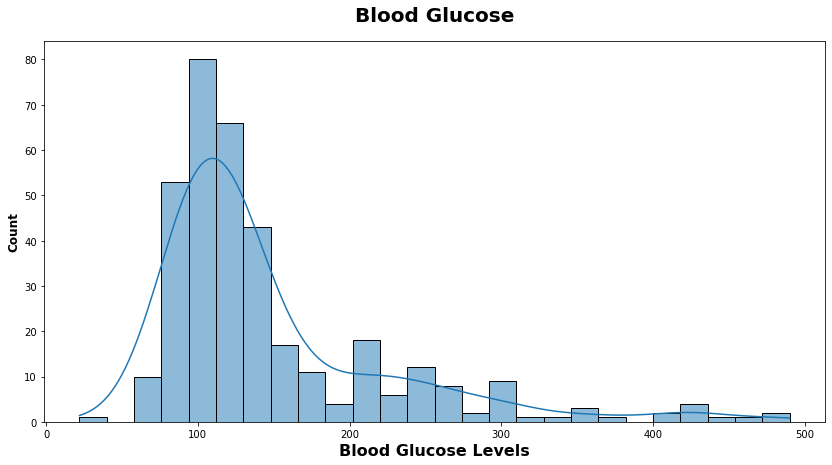

In [59]:
plt.subplots(figsize=(14,7))
sns.histplot(x="Blood_Glucose_Random",data= df, kde=True)
plt.title("Blood Glucose", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Blood Glucose Levels", weight="bold", fontsize=16)
plt.show()

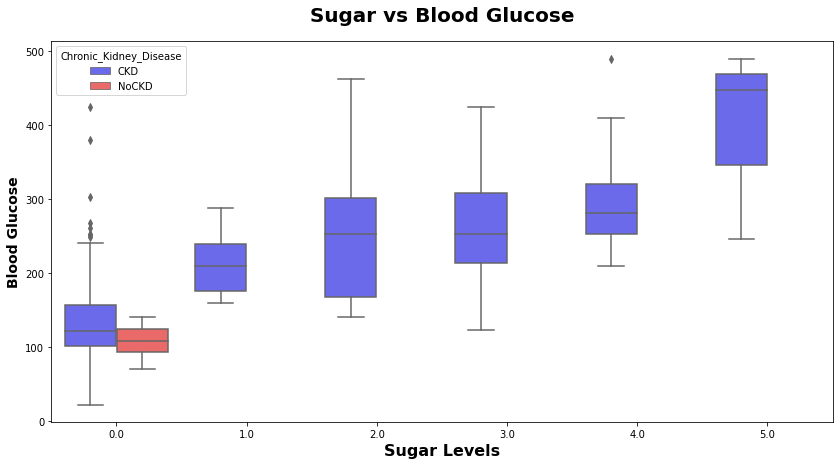

In [39]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="Blood_Glucose_Random",x='Sugar',data= df,palette="seismic", hue='Chronic_Kidney_Disease')
plt.title("Sugar vs Blood Glucose", weight="bold",fontsize=20, pad=20)
plt.ylabel("Blood Glucose", weight="bold", fontsize=14)
plt.xlabel("Sugar Levels", weight="bold", fontsize=16)
plt.show()

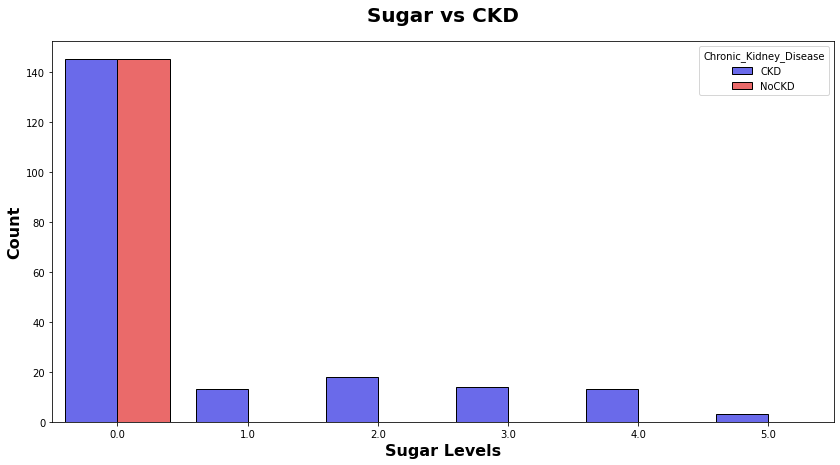

In [40]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Sugar",hue="Chronic_Kidney_Disease", data= df,ec = "black",palette="seismic")
plt.title("Sugar vs CKD", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=16)
plt.xlabel("Sugar Levels", weight="bold", fontsize=16)
plt.show()

**Report:**
* As per the Chart If Sugar levels and Blood Glucose increases the chance of CKD in Patients.
* Blood and Sugar has positive effect over the Chronic Kidney Disease.

### 4.9 Bacteria and its effect on Chronic Kidney Disease.

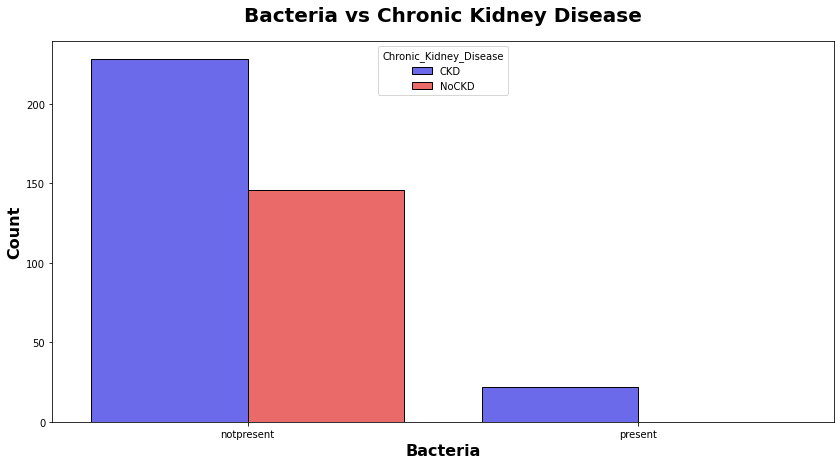

In [41]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Bacteria",hue="Chronic_Kidney_Disease", data= df,ec = "black",palette="seismic")
plt.title("Bacteria vs Chronic Kidney Disease", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=16)
plt.xlabel("Bacteria", weight="bold", fontsize=16)
plt.show()

**Report:**
- Very Few inquiries has been followed for 6 times, and they have the highes ratio
- It seem like in the second followups, people confused and had less Purchase.

### 4.10 Blood Urea, Sodium, Potassium and its effect on Chronic Kidney Disease

**Serum Creatinine**
* The amount of creatinine in your blood should be relatively stable. An increased level of creatinine may be a sign of poor kidney function. Serum creatinine is reported as milligrams of creatinine to a deciliter of blood (mg/dL)

**Sodium**
* A normal blood sodium level is between 135 and 145 milliequivalents per liter (mEq/L).

**Potassium**
* Your blood potassium level is normally 3.6 to 5.2 millimoles per liter (mmol/L). 

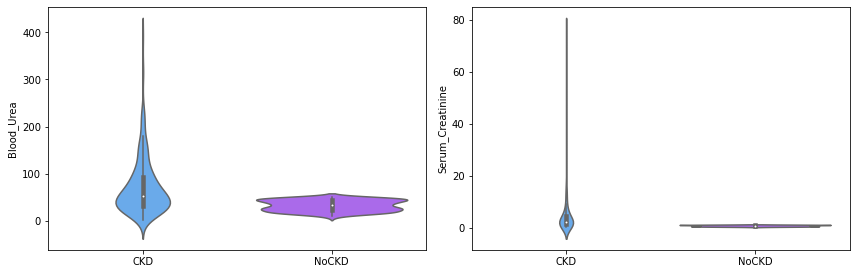

In [42]:
fig = plt.figure(figsize=(12, 30))
plot = ['Blood_Urea','Serum_Creatinine']
for i in range(0, len(plot)):
    ax = plt.subplot(8, 2, i+1)

    sns.violinplot(data= df ,x='Chronic_Kidney_Disease', y=plot[i], palette='cool', box=True)
    ax.set(xlabel=None)
    plt.tight_layout()

**Report**
* As per the Chart if the Blood Urea Level is more there is more chance of CKD.
* Higher the Serum Creatinine level more the chance of CKD.
* Higher Potassium has more chance of CKD and also Hyperkalemia.

### 4.11 Blood Test Report and its effect on Chronic Kidney Disease.

In [43]:
df.columns

Index(['Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar',
       'Red_Blood_Cells', 'Pus_Cells', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume', 'White_Blood_Cells',
       'Red_Blood_Cell_Count', 'Hypertension', 'Diabetes_Mellitus',
       'Coronary_Artery_Disease', 'Appetite', 'Pedal_Edema', 'Anemia',
       'Chronic_Kidney_Disease', 'AgeGroup'],
      dtype='object')

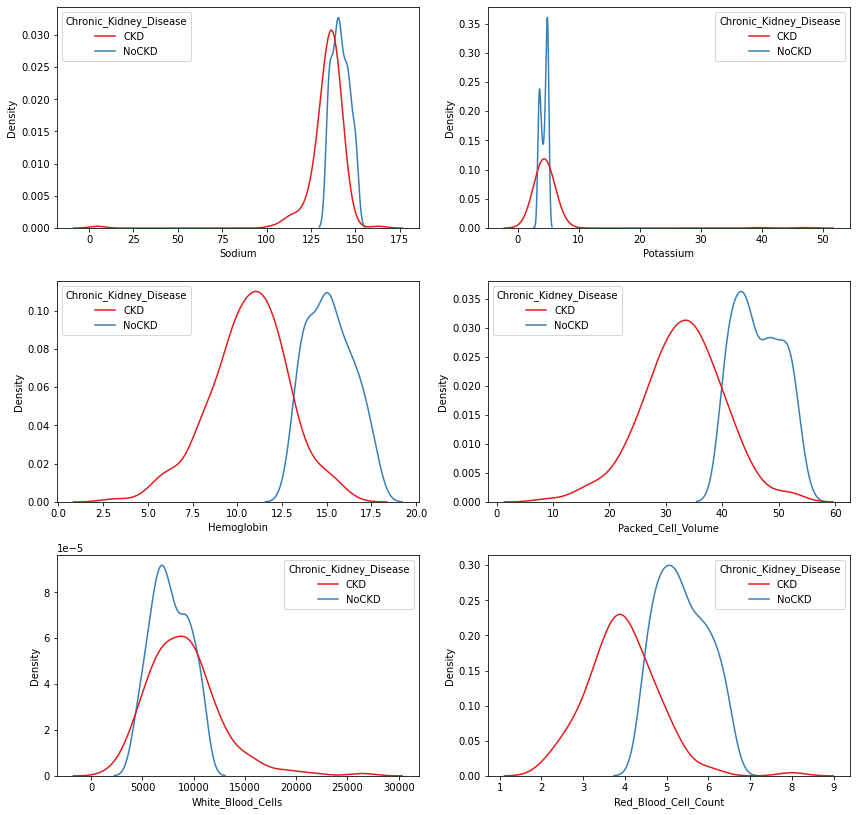

In [44]:
fig = plt.figure(figsize=(12, 30))
plot = ['Sodium','Potassium', 'Hemoglobin', 'Packed_Cell_Volume', 'White_Blood_Cells', 'Red_Blood_Cell_Count']
for i in range(0, len(plot)):
    ax = plt.subplot(8, 2, i+1)

    sns.kdeplot(data= df ,hue='Chronic_Kidney_Disease', x=plot[i], palette='Set1')
    plt.tight_layout()

**Report:**
- Lower `Hemoglobin, Packed_Cell_Volume, Red_Blood_Cell_Count` has more chance of CKD.
- other features doesnt have any impact on the target.

### 4.12 HyperTension vs Chronic Kidney Disease

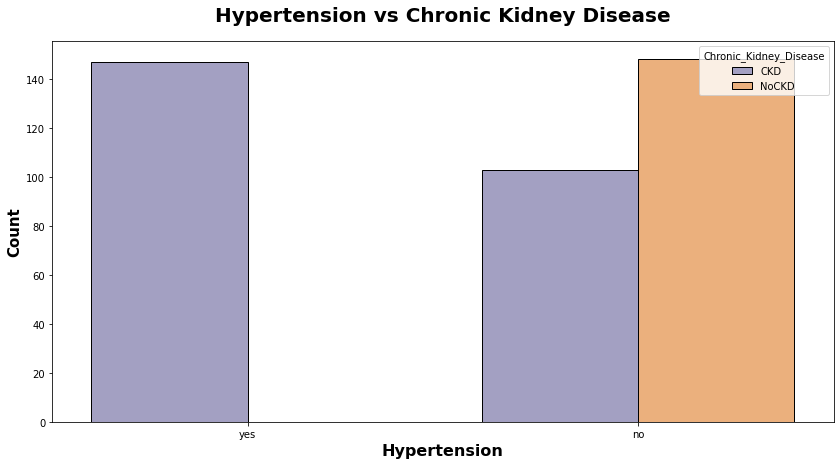

In [45]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Hypertension",hue="Chronic_Kidney_Disease", data= df,ec = "black",palette="tab20c_r")
plt.title("Hypertension vs Chronic Kidney Disease", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Hypertension", weight="bold", fontsize=16)
plt.show()

**Report:**
* As Per Chart we can see People who have Hypertension has 100% CKD in the sample.
* People with less Hypertension have less chance of CKD.

### 4.13 Diabetes Mellitus and its effect on Chronic Kidney Disease.

* **Diabetes mellitus (DM)** is a disease of inadequate control of blood levels of glucose. It has many subclassifications, including type 1, type 2, maturity-onset diabetes of the young (MODY), gestational diabetes, neonatal diabetes, and steroid-induced diabetes. 

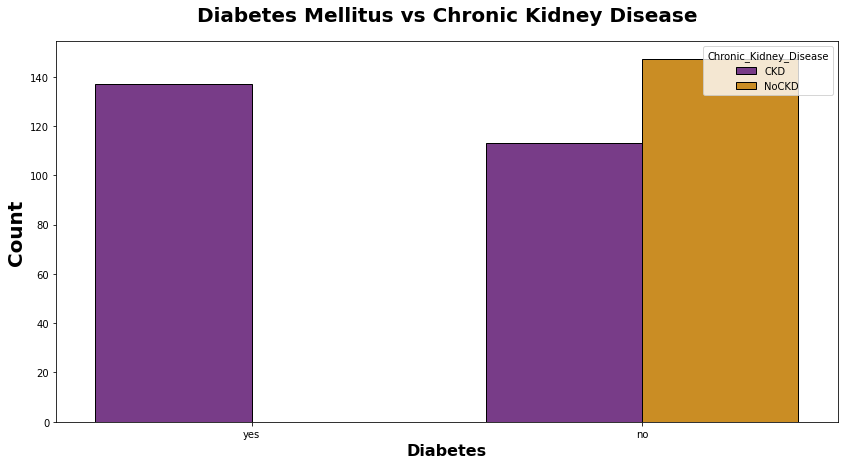

In [46]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Diabetes_Mellitus", hue='Chronic_Kidney_Disease',data= df,ec = "black",palette="CMRmap")
plt.title("Diabetes Mellitus vs Chronic Kidney Disease", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Diabetes", weight="bold", fontsize=16)
plt.show()

**Report:**
* As Per the Chart people with Diabetes Mellitus has more chance of CKD than the people who don't have Diabetes

### 4.14 Coronary artery disease and its effect on Chronic Kidney Disease.

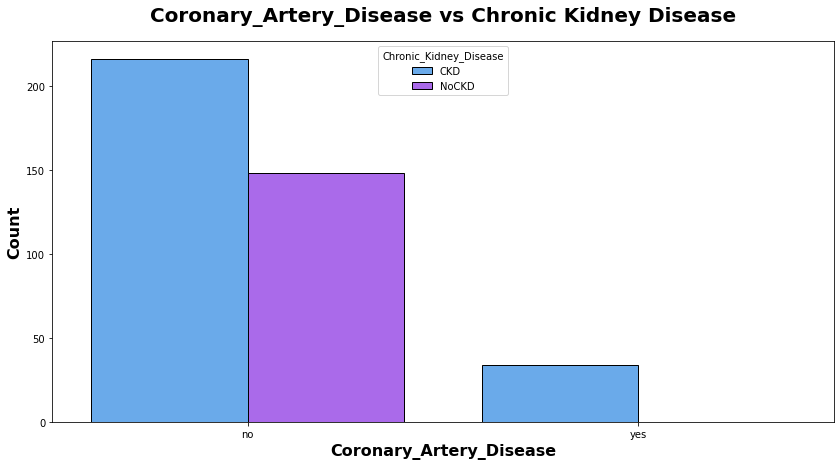

In [47]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Coronary_Artery_Disease", hue='Chronic_Kidney_Disease',data= df,ec = "black",palette="cool")
plt.title("Coronary_Artery_Disease vs Chronic Kidney Disease", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=16)
plt.xlabel("Coronary_Artery_Disease", weight="bold", fontsize=16)
plt.show()

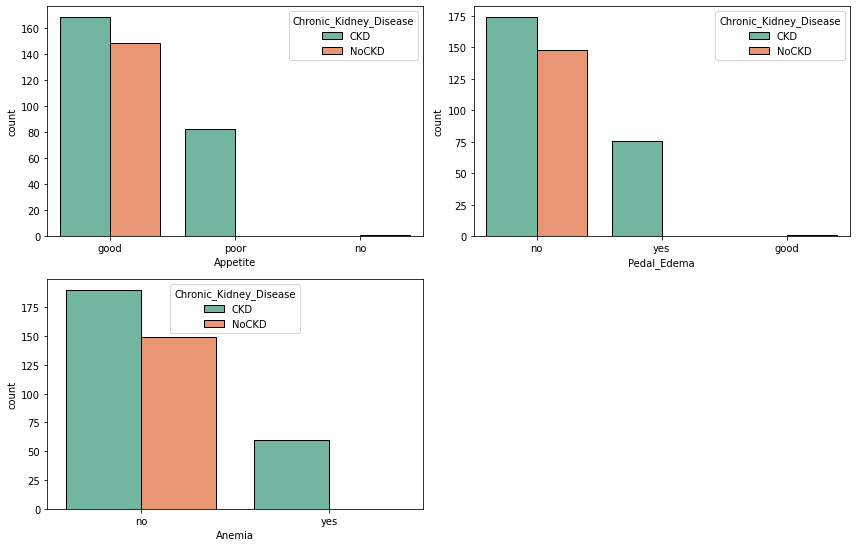

In [48]:
fig = plt.figure(figsize=(12, 30))
plot = ['Appetite', 'Pedal_Edema', 'Anemia']
for i in range(0, len(plot)):
    ax = plt.subplot(8, 2, i+1)

    sns.countplot(data= df ,hue='Chronic_Kidney_Disease', x=plot[i], palette='Set2', ec='k')
    plt.tight_layout()

**Report:**
* People who has even good appetite has CKD, so it doesnt have any impact.
* People with Poor appetite has higher chance of CKD. 
* People who has Anemia has higher chance of CKD.
* People who has Pedal Edema has Higher chance of CKD.

In [49]:
########################-------------Feature Engineering and Model Training in Next ipynb------------###########################